In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
a_df =df.drop(['DoctorInCharge', 'PatientID'], axis=1, inplace=True)

df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


### Data Pre-processing

In [4]:
X = df.drop('Diagnosis', axis= 1)
y = df['Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1433,87,1,2,1,27.764232,1,16.543170,0.281379,5.923418,7.836104,...,25.399206,3.085543,0,0,6.643693,0,0,0,0,0
630,70,0,0,3,37.098744,0,1.360202,9.242990,1.819284,5.218052,...,8.292136,5.616830,0,1,3.884562,0,0,0,0,1
78,82,1,3,2,15.908275,0,16.329031,1.915913,6.607292,6.146166,...,21.042238,3.662461,0,0,4.013722,0,0,1,1,0
366,76,1,0,2,30.302432,1,11.814030,6.281170,6.204349,6.825155,...,28.609438,4.648135,0,0,9.355700,1,0,1,0,1
1996,61,0,0,2,24.565357,1,2.273373,9.976581,2.057188,4.715534,...,2.629135,9.601238,1,0,8.818932,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,82,1,0,2,22.874070,0,16.006145,7.411056,2.341965,6.688947,...,7.325867,5.432951,0,0,0.214825,0,0,1,0,0
1095,82,0,1,3,25.522233,0,15.432489,4.149322,9.605963,5.235691,...,11.671289,0.298203,1,0,5.590417,0,0,0,0,1
1130,85,0,1,2,29.216597,0,9.424858,8.004951,4.276642,7.641721,...,28.463207,1.957638,0,0,4.030134,0,0,0,0,0
1294,89,1,0,1,25.741021,0,0.036260,6.292084,9.072249,8.497493,...,6.230189,5.535547,0,0,3.464861,0,0,0,0,0


In [5]:
y_train

1433    0
630     1
78      1
366     0
1996    1
       ..
1638    0
1095    1
1130    0
1294    0
860     0
Name: Diagnosis, Length: 1719, dtype: int64

# Building the models

In [6]:
kf = KFold(n_splits= 5, shuffle= True, random_state= 42)

models = {
    'DecisionTree': DecisionTreeClassifier(), 'RandomForest': RandomForestClassifier(), 'svc': SVC()
}

# Define parametersh
param_grids = {
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    },
    
    'RandomForest': {
        'n_estimators': randint(50, 200),
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    },
    
    'svc': {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
    }
}

### Randomised grid dearch

In [7]:
# for name, model in models.items():
#     #print(name)
#     print(f"Running RandomizedSearchCV for {name}...")
#     random_search = RandomizedSearchCV(model, param_distributions=param_grids[name], cv =kf, n_iter =100, random_state=42, n_jobs=-1)
#     random_search.fit(X_train_scaled, y_train)
#     print(f"Best parameters for {name}: {random_search.best_params_}\n")


Running RandomizedSearchCV for DecisionTree...
Best parameters for DecisionTree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 9}

Running RandomizedSearchCV for RandomForest...
Best parameters for RandomForest: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 183}

Running RandomizedSearchCV for svc...
Best parameters for svc: {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.85      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.93      0.93       430



Confusion Matrix:
 [[272   5]
 [ 23 130]]


Accuracy Score:
 0.9348837209302325
[0.9348837209302325]


[0.9338733940478126]
[0.9365970306135856]


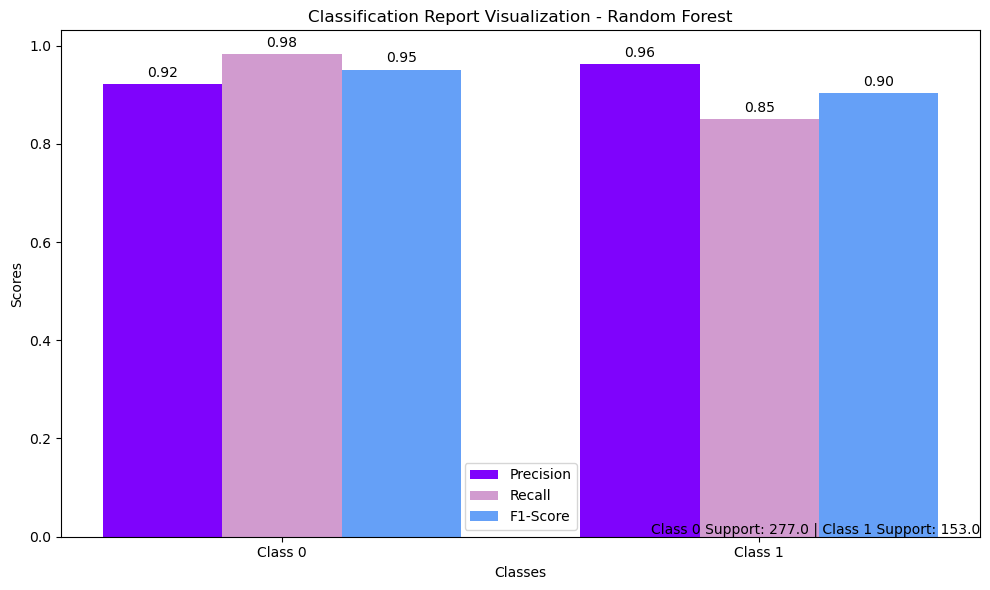

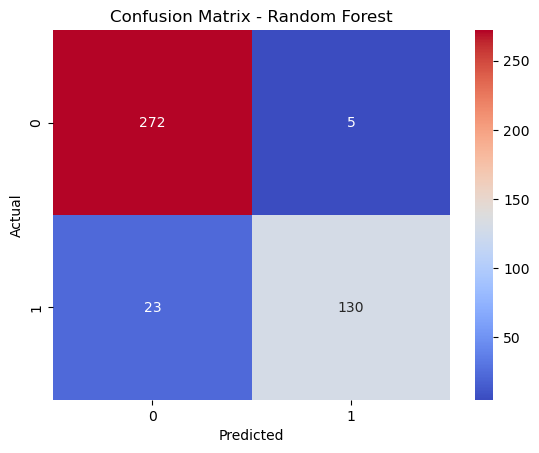

In [8]:
accuracy_scores = [] 
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}
modelr = RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2, min_samples_split=7, n_estimators=183, random_state=42)
modelr.fit(X_train_scaled, y_train)
y_predr = modelr.predict(X_test_scaled)
accuracyr = accuracy_score(y_test, y_predr)
report_r = classification_report(y_test, y_predr, output_dict=True)

precision_r = report_r['weighted avg']['precision']
recall_r = report_r['weighted avg']['recall']
f1_r = report_r['weighted avg']['f1-score']

metrics['Model'].append('Random Forest')
metrics['Accuracy'].append(accuracyr)
metrics['Precision'].append(precision_r)
metrics['Recall'].append(recall_r)
metrics['F1-Score'].append(f1_r)

print('Classification Report:\n', classification_report(y_test, y_predr))
print('\n=================================================\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predr))
print('\n=================================================\n')
print('Accuracy Score:\n', accuracyr)

accuracy_scores.append(accuracyr)
print(accuracy_scores)
print('\n=================================================\n')
print(metrics['F1-Score'])
print(metrics['Precision'])

# Plot Classification Report
classes = ['Class 0', 'Class 1']
precision = [report_r['0']['precision'], report_r['1']['precision']]
recall = [report_r['0']['recall'], report_r['1']['recall']]
f1_score = [report_r['0']['f1-score'], report_r['1']['f1-score']]
support = [report_r['0']['support'], report_r['1']['support']]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision', color='#7f03fc')
bar2 = ax.bar(x, recall, width, label='Recall', color='#d19bcf')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='#65a0f7')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Visualization - Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

support_text = f'Class 0 Support: {support[0]} | Class 1 Support: {support[1]}'
ax.annotate(support_text, xy=(1, 0), xycoords='axes fraction', fontsize=10, color='black', ha='right', va='bottom')

plt.tight_layout()
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       277
           1       0.79      0.73      0.76       153

    accuracy                           0.84       430
   macro avg       0.83      0.81      0.82       430
weighted avg       0.84      0.84      0.84       430



Confusion Matrix:
 [[248  29]
 [ 41 112]]


Accuracy Score:
 0.8372093023255814
[0.9348837209302325, 0.8372093023255814]


[0.9338733940478126, 0.835612739631147]
[0.9365970306135856, 0.835428690788246]


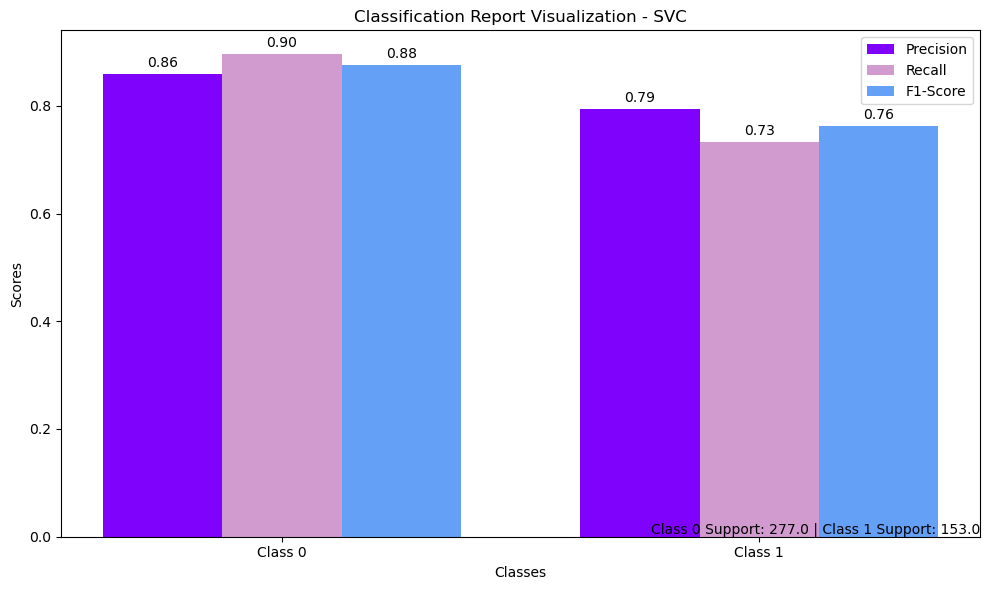

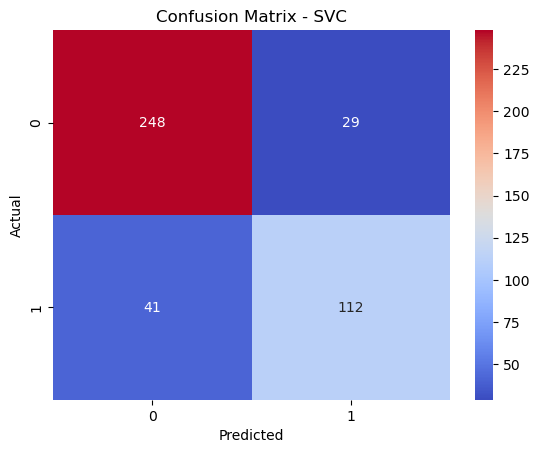

In [9]:
modelsvc = SVC(kernel='rbf', gamma=0.001, C=100)
modelsvc.fit(X_train_scaled, y_train)
y_predsvc = modelsvc.predict(X_test_scaled)
accuracysvc = accuracy_score(y_test, y_predsvc)
report_svc = classification_report(y_test, y_predsvc, output_dict=True)

# Extract metrics
precision_svc = report_svc['weighted avg']['precision']
recall_svc = report_svc['weighted avg']['recall']
f1_svc = report_svc['weighted avg']['f1-score']

metrics['Model'].append('SVC')
metrics['Accuracy'].append(accuracysvc)
metrics['Precision'].append(precision_svc)
metrics['Recall'].append(recall_svc)
metrics['F1-Score'].append(f1_svc)

print('Classification Report:\n', classification_report(y_test, y_predsvc))
print('\n=================================================\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predsvc))
print('\n=================================================\n')
print('Accuracy Score:\n', accuracysvc)

accuracy_scores.append(accuracysvc)
print(accuracy_scores)
print('\n=================================================\n')
print(metrics['F1-Score'])
print(metrics['Precision'])

# Plot Classification Report
classes = ['Class 0', 'Class 1']
precision = [report_svc['0']['precision'], report_svc['1']['precision']]
recall = [report_svc['0']['recall'], report_svc['1']['recall']]
f1_score = [report_svc['0']['f1-score'], report_svc['1']['f1-score']]
support = [report_svc['0']['support'], report_svc['1']['support']]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision', color='#7f03fc')
bar2 = ax.bar(x, recall, width, label='Recall', color='#d19bcf')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='#65a0f7')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Visualization - SVC')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

support_text = f'Class 0 Support: {support[0]} | Class 1 Support: {support[1]}'
ax.annotate(support_text, xy=(1, 0), xycoords='axes fraction', fontsize=10, color='black', ha='right', va='bottom')

plt.tight_layout()
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predsvc)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       277
           1       0.93      0.84      0.88       153

    accuracy                           0.92       430
   macro avg       0.92      0.90      0.91       430
weighted avg       0.92      0.92      0.92       430



Confusion Matrix:
 [[267  10]
 [ 24 129]]


Accuracy Score:
 0.9209302325581395
[0.9348837209302325, 0.8372093023255814, 0.9209302325581395]


[0.9338733940478126, 0.835612739631147, 0.920009175793852]
[0.9365970306135856, 0.835428690788246, 0.9212731277457056]


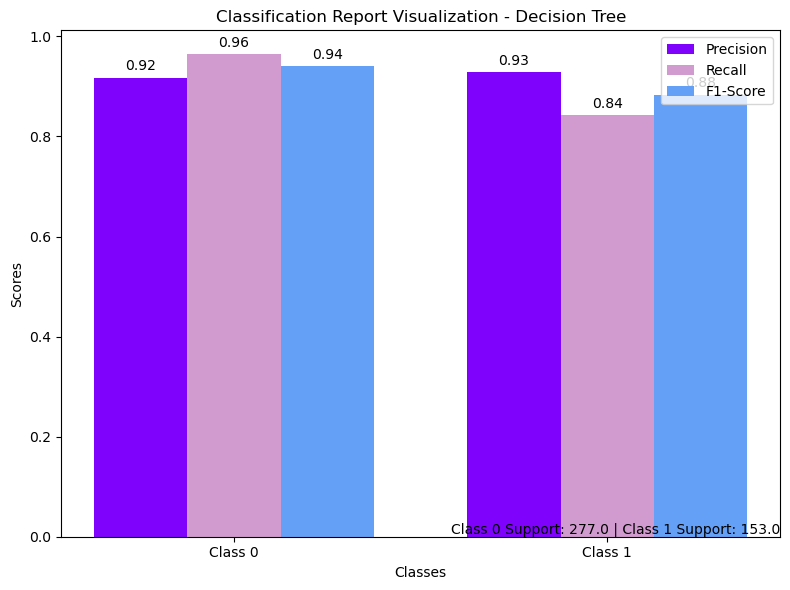

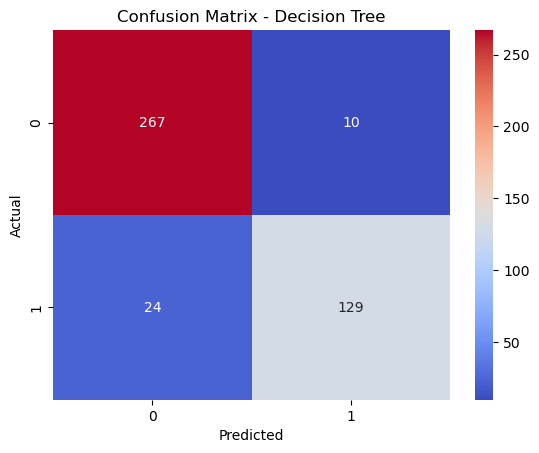

In [10]:
modeld = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=4, min_samples_split=9)
modeld.fit(X_train_scaled, y_train)
y_predd = modeld.predict(X_test_scaled)
accuracyd = accuracy_score(y_test, y_predd)
report_d = classification_report(y_test, y_predd, output_dict=True)

# Extract metrics
precision_d = report_d['weighted avg']['precision']
recall_d = report_d['weighted avg']['recall']
f1_d = report_d['weighted avg']['f1-score']

metrics['Model'].append('Decision Tree')
metrics['Accuracy'].append(accuracyd)
metrics['Precision'].append(precision_d)
metrics['Recall'].append(recall_d)
metrics['F1-Score'].append(f1_d)

print('Classification Report:\n', classification_report(y_test, y_predd))
print('\n=================================================\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predd))
print('\n=================================================\n')
print('Accuracy Score:\n', accuracyd)

accuracy_scores.append(accuracyd)
print(accuracy_scores)
print('\n=================================================\n')
print(metrics['F1-Score'])
print(metrics['Precision'])

# Plot Classification Report
classes = ['Class 0', 'Class 1']
precision = [report_d['0']['precision'], report_d['1']['precision']]
recall = [report_d['0']['recall'], report_d['1']['recall']]
f1_score = [report_d['0']['f1-score'], report_d['1']['f1-score']]
support = [report_d['0']['support'], report_d['1']['support']]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision', color='#7f03fc')
bar2 = ax.bar(x, recall, width, label='Recall', color='#d19bcf')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='#65a0f7')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Visualization - Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

support_text = f'Class 0 Support: {support[0]} | Class 1 Support: {support[1]}'
ax.annotate(support_text, xy=(1, 0), xycoords='axes fraction', fontsize=10, color='black', ha='right', va='bottom')

plt.tight_layout()
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predd)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


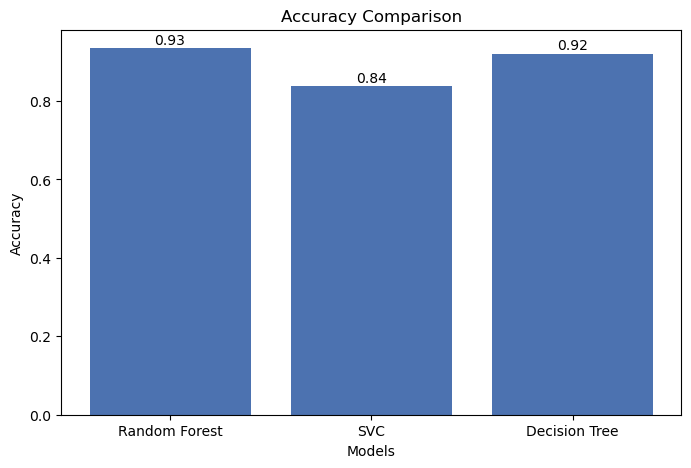

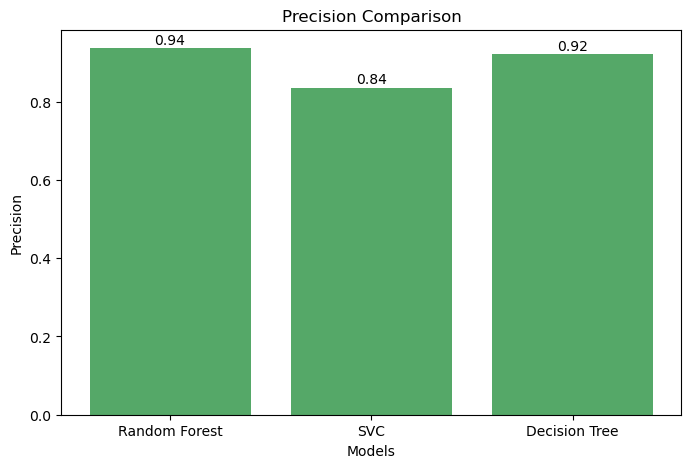

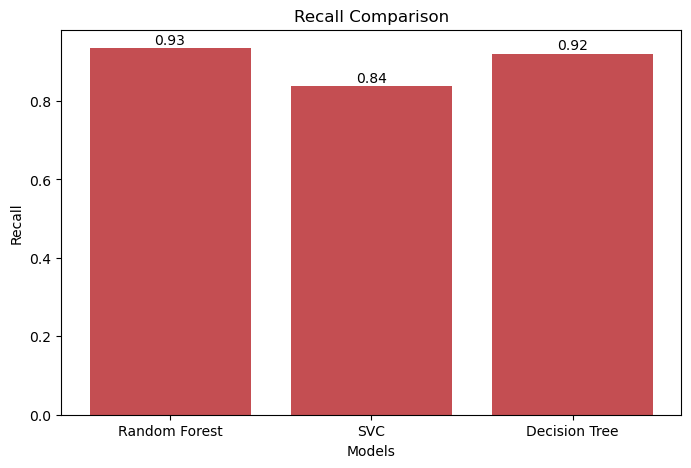

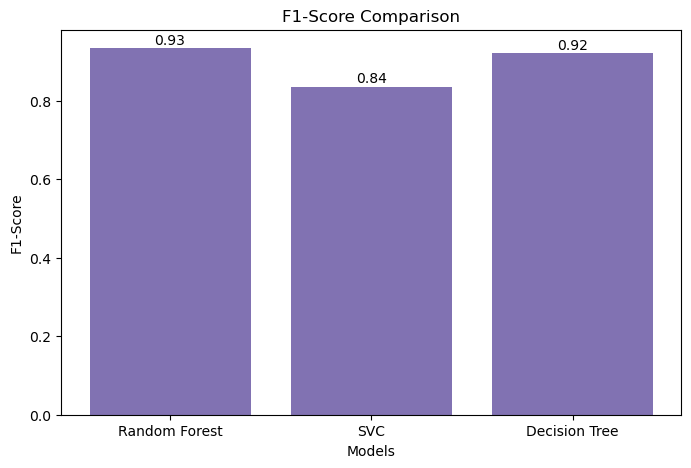

In [11]:
models = metrics['Model']
accuracy = metrics['Accuracy']
precision = metrics['Precision']
recall = metrics['Recall']
f1_score = metrics['F1-Score']

# Plotting function
def plot_metric(data, title, color):
    plt.figure(figsize=(8, 5))
    plt.bar(models, data, color=color)
    plt.xlabel('Models')
    plt.ylabel(title)
    plt.title(f'{title} Comparison')

    # Adding values on top of bars
    for i, value in enumerate(data):
        plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

    plt.show()

# Plot each metric separately
plot_metric(accuracy, 'Accuracy', '#4C72B0')
plot_metric(precision, 'Precision', '#55A868')
plot_metric(recall, 'Recall', '#C44E52')
plot_metric(f1_score, 'F1-Score', '#8172B2')

In [12]:
metrics

{'Model': ['Random Forest', 'SVC', 'Decision Tree'],
 'Accuracy': [0.9348837209302325, 0.8372093023255814, 0.9209302325581395],
 'Precision': [0.9365970306135856, 0.835428690788246, 0.9212731277457056],
 'Recall': [0.9348837209302325, 0.8372093023255814, 0.9209302325581395],
 'F1-Score': [0.9338733940478126, 0.835612739631147, 0.920009175793852]}